<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [129]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [130]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Частотное распределение по Freedom:


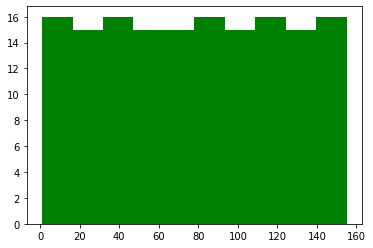

Частотное распределение по Poitive effect:


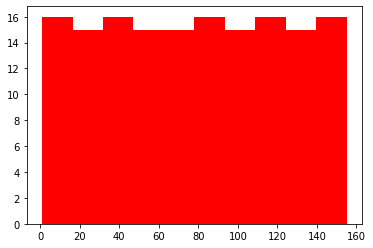

Визуально это равномерное распределение в обоих случаях


In [33]:
#print('Стоблцы, имеющие пустые значения: ')
#print(df.isnull().sum())
freedom = df['Freedom']
pos_eff = df['Positive affect']
print('Частотное распределение по Freedom:')
plt.hist(freedom, 10, facecolor = 'g')
plt.show()
print('Частотное распределение по Poitive effect:')
plt.hist(pos_eff, 10, facecolor = 'r')
plt.show()
print('Визуально это равномерное распределение в обоих случаях')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Выбросы в части пустых значений:  1 шт
Медиана: 
 78.0
Мода: 
 не возможно посчитать, так как все значения уникальны и встречаются с одинаковой частотой 1 раз
Математическое ожидание: 
 78.0
Стандартное отклонение: 
 44.74371464239419
Дисперсия: 
 2002.0
Минимальное значение: 
 1.0
Максимальное значение: 
 155.0
Размах: 
 154.0


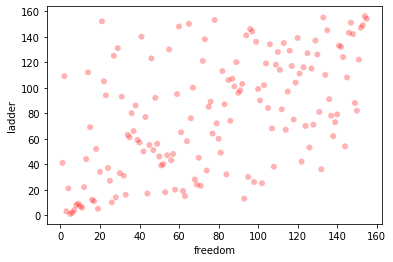

Выбросов нет значений, далеких от среднего особо нет


In [88]:
#Исключаем из выборки пустые значения (Quatar)
freedom = df[df['Freedom'].isnull() == False]['Freedom']
print('Выбросы в части пустых значений: ', df['Freedom'].isnull().sum(), 'шт')
print('Медиана: \n', statistics.median(freedom))
#print('Мода: \n', statistics.mode(freedom))
print('Мода: \n не возможно посчитать, так как все значения уникальны и встречаются с одинаковой частотой 1 раз')
#можно проверить len(df['Freedom'].unique())'
print('Математическое ожидание: \n', df['Freedom'].mean())
print('Стандартное отклонение: \n', statistics.pstdev(freedom))
print('Дисперсия: \n', statistics.pvariance(freedom))
print('Минимальное значение: \n', freedom.min())
print('Максимальное значение: \n', freedom.max())
print('Размах: \n', freedom.max() - freedom.min())
ladder = df[df['Freedom'].isnull() == False]['Ladder']
fig, ax = plt.subplots()
ax.scatter(freedom, ladder, c='red', alpha=0.3, edgecolors='none')
plt.xlabel('freedom')
plt.ylabel('ladder')
plt.show()
print('Выбросов нет значений, далеких от среднего особо нет')

Почему нельзя найти моду?

In [94]:
print('Мода: \n не возможно посчитать, так как все значения уникальны и встречаются с одинаковой частотой 1 раз')
print('Проверка: Количество уникальных значение равно количеству строк таблицы. \n Количество уникальных значений: \n', len(df['Freedom'].unique()))
print('Общее количество строк таблицы: \n', len(df['Freedom']))


Мода: 
 не возможно посчитать, так как все значения уникальны и встречаются с одинаковой частотой 1 раз
Проверка: Количество уникальных значение равно количеству строк таблицы. 
 Количество уникальных значений: 
 156
Общее количество строк таблицы: 
 156


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

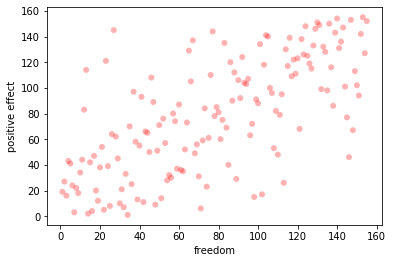

Визуально есть корреляция
Математический корреляция слабая (на основе коэффициента Пирсона) 0.6817698430601657
Положительная корреляция говорит о том, что данные зависимы, то есть изменение одной величины также заметно и на другой (тренд)


In [131]:
from scipy.stats import pearsonr

freedom = df[df['Freedom'].isnull() == False]['Freedom']
pos_eff = df[df['Freedom'].isnull() == False]['Positive affect']

fig, ax = plt.subplots()
ax.scatter(freedom, pos_eff, c='red', alpha=0.3, edgecolors='none')
plt.xlabel('freedom')
plt.ylabel('positive effect')
plt.show()
print('Визуально есть корреляция')

corr, p_value = pearsonr(freedom, pos_eff)
print('Математический корреляция слабая (на основе коэффициента Пирсона)', corr)
print('Положительная корреляция говорит о том, что данные зависимы, то есть изменение одной величины также заметно и на другой (тренд)')

Нормализовать данные колонки Freedom (централизация + масштабирование)

Нормализованные данные Freedom: 
 0      0.025974
1      0.032468
2      0.012987
3      0.038961
4      0.116883
         ...   
150    0.129870
151    0.500000
152    1.000000
153    0.857143
154    0.993506
Name: 0, Length: 155, dtype: float64


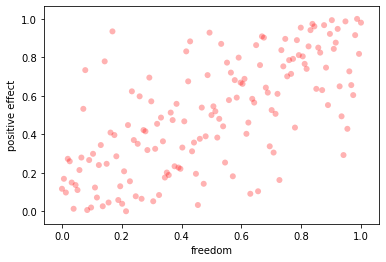

In [135]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df_clear = df.loc[df['Freedom'].isnull() == False, :]
scaled = min_max_scaler.fit_transform(df_clear[['Freedom', 'Positive affect']])
df_norm = pd.DataFrame(scaled)
print('Нормализованные данные Freedom: \n',df_norm[0])


fig, ax = plt.subplots()
ax.scatter(df_norm[0], df_norm[1], c='red', alpha=0.3, edgecolors='none')
plt.xlabel('freedom')
plt.ylabel('positive effect')
plt.show()

Построить матрицу корреляций для всех колонок таблицы

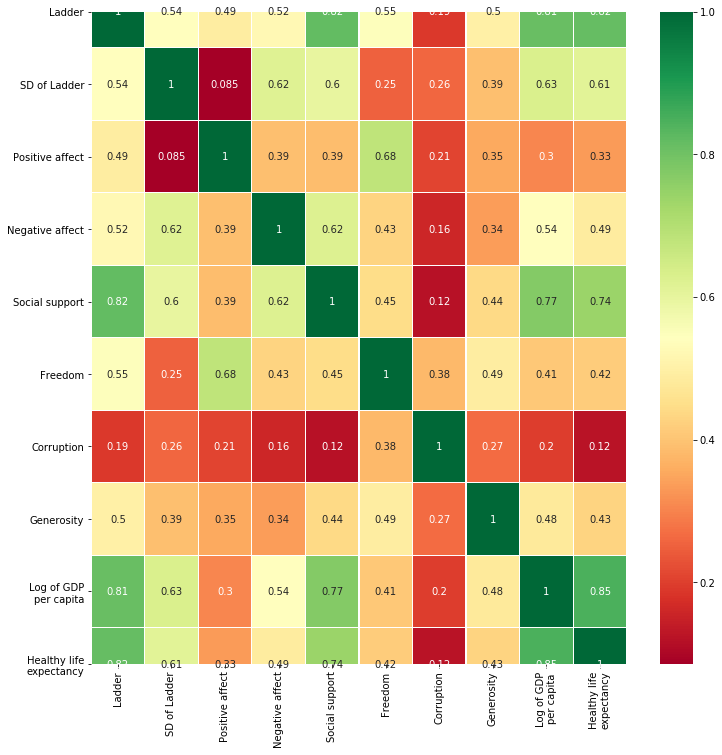

In [136]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [137]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
data=pd.read_csv(url)
data[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

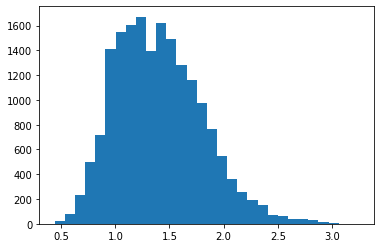

Это нормльное распределение со смещением влево


In [142]:
#data[data['AveragePrice'].isnull()].sum()

plt.hist(data['AveragePrice'], 30)
plt.show()
print('Это нормльное распределение со смещением влево')


Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [146]:
from scipy.stats import pearsonr
corr4046, p_value = pearsonr(data['4046'], data['AveragePrice'])
corr4225, p_value = pearsonr(data['4225'], data['AveragePrice'])
corr4770, p_value = pearsonr(data['4770'], data['AveragePrice'])
print('Слабая обратная корреляция между 4046 и Average Price: ', corr4046)
print('Слабая обратная корреляция между 4225 и Average Price: ', corr4225)
print('Слабая обратная корреляция между 4770 и Average Price: ', corr4770)
print('Взаимосвязь между данными (тренды поведения данных) любого из сортов авакадо и средней ценой слабая и даже обратная (при росте одной, другая снижается)')

Слабая обратная корреляция между 4046 и Average Price:  -0.2083170484878848
Слабая обратная корреляция между 4225 и Average Price:  -0.17292777250933541
Слабая обратная корреляция между 4770 и Average Price:  -0.1794459839797562
Взаимосвязь между данными (тренды поведения данных) любого из сортов авакадо и средней ценой слабая и даже обратная (при росте одной, другая снижается)
